<a href="https://colab.research.google.com/github/Jandsy/ml_finance_imperial/blob/main/Programming_Sessions/Programming_session_4/Solution_Programming_Session_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<center>Machine Learning and Finance </center>**


## <center> Programming Session 4 - Introduction to Deep Learning Solution </center>


# Introduction to Deep Learning

## Objective

The objective of this session is to use a neural network for a sentiment analysis task on the IMDb dataset. We will learn to classify movie reviews as positive or negative, based on the text content of the reviews.

## Outline

- [Exploring the Dataset](#Exploring-the-Dataset)

- [Deep Learning](#Deep-Learning)

## Introduction

In this tutorial, we will dive into the world of natural language processing (NLP) using neural networks. Our focus will be on sentiment analysis, a key area in NLP that deals with understanding emotions in text.

## Challenge

The challenge in sentiment analysis lies in accurately classifying the sentiment of text content - in our case, movie reviews - as either positive or negative. This involves understanding the nuances of human language, slang, sarcasm, and contextual meaning.

## DataSet Overview

We will be using the IMDb dataset, a set of 50,000 movie reviews labeled as positive or negative. This dataset is widely used for training and testing in the domain of sentiment analysis and serves as a benchmark for new models.

## Objectives

Our goals for this session are to:
1. Understand the basics of sentiment analysis and its importance.
2. Explore and preprocess the IMDb dataset for neural network training.
3. Build and train a neural network to classify movie reviews.
4. Evaluate the performance of our model and explore ways to improve it.


<center><img width="300" src = "https://drive.google.com/uc?export=view&id=1qhP9rw1v2zx3NouaFhEiFAnYHpkqPGST"></center>

In [ ]:
!pip install tensorflow==2.15.0

In [3]:
# Import Basic Modules
import tensorflow as tf # to create neural networks
import numpy as np # to manipulate arrays
import matplotlib.pyplot as plt # for plots
plt.style.use('dark_background') # to adapt the colors to a dark background

# 1. Exploring the dataset

## 1.1 Preprocessing the data

* Since today's programming session is not focused on text data preprocessing (refer to Lecture 6 for that), we will be utilizing preprocessed reviews.

* Every review consists of a sequence of words. These sequences are preprocessed through a dictionary named **word2idx**, which assigns an integer to every word.


<center><img width="700" src = "https://drive.google.com/uc?export=view&id=1Gp8xNTpTxR9TMaS6frkLmHt9YxYeN2RD"></center>

- In the provided example, words are arranged in an index based on their frequency within the dataset. For instance, the integer "4" represents the fourth most commonly occurring word in the dataset.

- Consequently, the result consists of preprocessed reviews presented as a **list of integers**, depicted in the accompanying figure.


<center><img width="700" src = "https://drive.google.com/uc?export=view&id=1GM14DjLNMzgzOBIxas6d2rJvK83iYdQJ"></center>

Consider a vocabulary size denoted as `V = 10000`, representing the number of words intended for processing. Any other words beyond this vocabulary size will be treated uniformly as "unknown" or "out of vocabulary" and assigned the same index.


In [4]:
V = 10000


---
<font color=green>Q1:</font>
<br><font color='green'>
Load the `imdb` dataset using `tensorflow.keras.datasets` as described in the [TensorFlow documentation](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/imdb/load_data). Configure the loader with `num_words` set to `V`, `maxlen` set to 1000, `start_char` set to 1, `oov_char` set to 2, and `index_from` set to 3.

</font>

---

In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(path='imdb.npz',
                                                                        num_words = V,
                                                                        maxlen = 1000,
                                                                        start_char = 1,
                                                                        oov_char = 2,
                                                                        index_from = 3)

17464789/17464789 [==============================] - 0s 0us/step


---
<font color=green>Q2:</font>
<br><font color='green'>
Display the initial training data as a list of integers (or 1D array).
</font>

---

In [6]:
print(np.array(x_train[0]))

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

---
<font color=green>Q3:</font>
<br><font color='green'>

Retrieve the `word2idx` dictionary using `imdb.get_word_index()`. What is the index associated with the word "movie"?
</font>

---

In [7]:
word2idx = tf.keras.datasets.imdb.get_word_index()

1641221/1641221 [==============================] - 0s 0us/step


In [8]:
word2idx['movie']

17

---
<font color=green>Q4:</font>
<br><font color='green'>
Create a dictionary named `idx2word` to invert the `word2idx` dictionary. Then, infer the original review corresponding to the initial training data, presented as a sequence of words rather than integers. It's crucial to consider that the indexes are shifted by 3 due to the reserved indices for "padding," "start of sequence," and "unknown," which are 0, 1, and 2 respectively.

</font>

---

In [9]:
idx2word = {value:key for key, value in word2idx.items()}

my_first_sequence = []
for idx in x_train[0]:
    try:
        my_first_sequence.append(idx2word[idx-3])
    except:
        my_first_sequence.append('oov')



In [10]:
np.array(my_first_sequence)

array(['oov', 'this', 'film', 'was', 'just', 'brilliant', 'casting',
       'location', 'scenery', 'story', 'direction', "everyone's",
       'really', 'suited', 'the', 'part', 'they', 'played', 'and', 'you',
       'could', 'just', 'imagine', 'being', 'there', 'robert', 'oov',
       'is', 'an', 'amazing', 'actor', 'and', 'now', 'the', 'same',
       'being', 'director', 'oov', 'father', 'came', 'from', 'the',
       'same', 'scottish', 'island', 'as', 'myself', 'so', 'i', 'loved',
       'the', 'fact', 'there', 'was', 'a', 'real', 'connection', 'with',
       'this', 'film', 'the', 'witty', 'remarks', 'throughout', 'the',
       'film', 'were', 'great', 'it', 'was', 'just', 'brilliant', 'so',
       'much', 'that', 'i', 'bought', 'the', 'film', 'as', 'soon', 'as',
       'it', 'was', 'released', 'for', 'oov', 'and', 'would', 'recommend',
       'it', 'to', 'everyone', 'to', 'watch', 'and', 'the', 'fly',
       'fishing', 'was', 'amazing', 'really', 'cried', 'at', 'the', 'end',
      

In [11]:
idx2word[1]

'the'

## 1.2 Creating the (N, V) tensor of Data

The data is a list of lists.


---
<font color=green>Q5:</font>
<br><font color='green'>
What is the maximum length of the sequences in the training data?
</font>

---

In [12]:
max([len(k) for k in x_train])

999

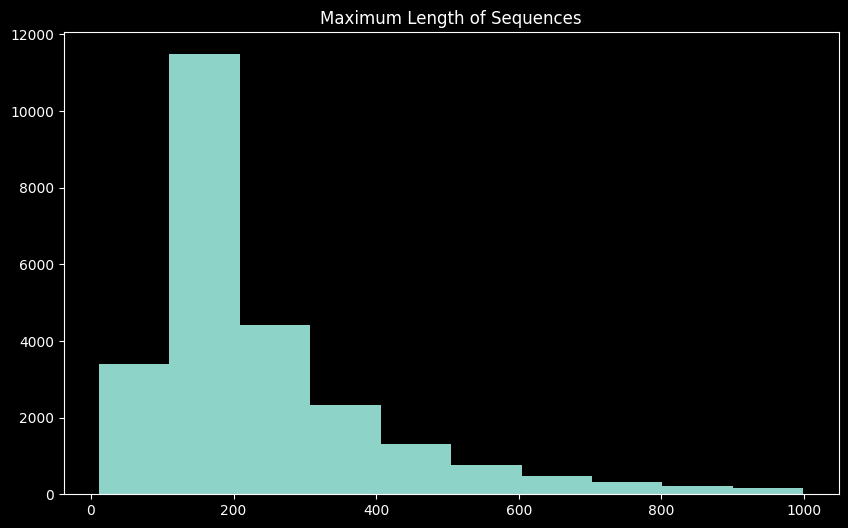

In [13]:
plt.figure(figsize = (10,6))
plt.hist([len(k) for k in x_train])
plt.title('Maximum Length of Sequences')
plt.show()

---
<font color=green>Q6:</font>
<br><font color='green'>
Define a function named `vectorize` which accepts the following inputs:
- `sequences`: a list containing lists of integers.
- `V`: The size of the vocabulary.
This function will produce a tensor with a shape of (N, V), where N is the length of the sequences.

The specifications are as follows:
- Each sequence is represented by a row in the (N, V) tensor.
- For every sequence, the corresponding row is a V-dimensional vector where all elements are 0 except for the indices present in the sequence. For instance,  the sequence [12, 564] will be represented by a V-dimensional vector where all elements are zeros except for indices 12 and 564.
</font>

---

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=1jw29117eRETMUSNquct9bdhhwfPOdBj5"></center>

In [14]:
def vectorize(sequences, V):
    N = len(sequences)

    input_tensor = np.zeros((N, V))
    for index, sequence in enumerate(sequences):
        input_tensor[index, sequence] = 1

    return input_tensor

---
<font color=green>Q7:</font>
<br><font color='green'>
Apply the `vectorize` function to both the training and test data to transform them into vectorized representations.
</font>

---

In [15]:
X_train = vectorize(x_train, V)
X_test = vectorize(x_test, V)

In [16]:
print(X_train.shape)

(24875, 10000)


In [17]:
print(X_test)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


---
<font color=green>Q8:</font>
<br><font color='green'>
Convert the labels to floating-point (`float32`) numbers using the `np.float32` method.
</font>

---

In [18]:
y_train = np.float32(y_train)

In [19]:
y_test = np.float32(y_test)

# 2. Deep Learning

## 2.2 Building the Model

---
<font color=green>Q9:</font>
<br><font color='green'>
Which loss function is most appropriate for a binary classification task? What activation function should be used as the final layer?
</font>

---


The loss function should be selected as the binary classification loss function, and the final layer ought to incorporate a **sigmoid** activation function


<center><img width="700" src = "https://drive.google.com/uc?export=view&id=1PJPvjjoPG6NASHekAFCxgu8OXwEfO7bN"></center>

---
<font color=green>Q10:</font>
<br><font color='green'>
Using `Sequential` from tensorflow.keras as explained in this [link](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential), Create the following model:
</font>

---


<center><img width="500" src = "https://drive.google.com/uc?export=view&id=1Hl_A1tK9ewEZD-3Jwz7HdchSF1q-LUqY"></center>

In [20]:
from tensorflow.keras.models import Sequential # to define a stack of layers
from tensorflow.keras.layers import Dense, Input # The dense layer and the input


model = Sequential()

model.add(Input(shape = (V,)))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2560256   
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 8)                 264       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2597553 (9.91 MB)
Trainable params: 2597553 (9.91 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


---
<font color=green>Q11:</font>
<br><font color='green'>
Compile the defined model with **Stochastic Gradient Descent** as the optimizer include accuracy in the metrics and choose the appropriate loss function. You can use model.compile method.
Then, fit the model to the training data and assign the results to a variable named `history`.

</font>

---

<center><img width="700" src = "https://drive.google.com/uc?export=view&id=1FQQv9phTnhFjMP54UvBLn6pps-l0L0AM"></center>

In [21]:
N_epochs = 20 # Number of epochs
M = 64 # batch size

In [22]:
model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['acc'])

In [23]:
history = model.fit(X_train, y_train, epochs = N_epochs, batch_size = M, validation_split = 0.3)

Epoch 1/20
273/273 [==============================] - 11s 37ms/step - loss: 0.6670 - acc: 0.6290 - val_loss: 0.6133 - val_acc: 0.6992
Epoch 2/20
273/273 [==============================] - 8s 29ms/step - loss: 0.4849 - acc: 0.8073 - val_loss: 0.4922 - val_acc: 0.7583
Epoch 3/20
273/273 [==============================] - 9s 32ms/step - loss: 0.3441 - acc: 0.8565 - val_loss: 0.3269 - val_acc: 0.8604
Epoch 4/20
273/273 [==============================] - 9s 33ms/step - loss: 0.2880 - acc: 0.8832 - val_loss: 0.3005 - val_acc: 0.8754
Epoch 5/20
273/273 [==============================] - 9s 32ms/step - loss: 0.2535 - acc: 0.8990 - val_loss: 0.3396 - val_acc: 0.8546
Epoch 6/20
273/273 [==============================] - 9s 32ms/step - loss: 0.2225 - acc: 0.9135 - val_loss: 0.4117 - val_acc: 0.8361
Epoch 7/20
273/273 [==============================] - 12s 44ms/step - loss: 0.2075 - acc: 0.9200 - val_loss: 0.2939 - val_acc: 0.8815
Epoch 8/20
273/273 [==============================] - 8s 29ms/step 

---
<font color=green>Q12:</font>
<br><font color='green'>
Display the losses and accuracies for the training and the validation data.
</font>

---

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

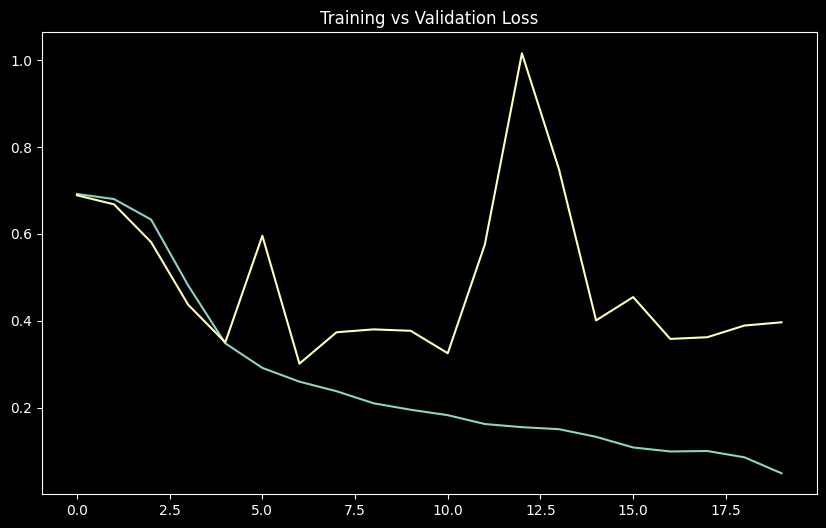

In [42]:
plt.figure(figsize = (10, 6))
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Testing Loss')
plt.title('Training vs Validation Loss')
plt.show()

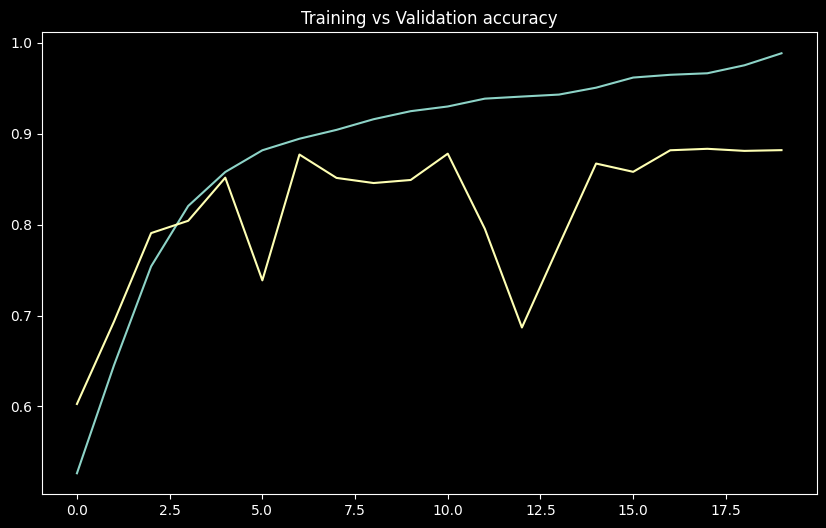

In [43]:
plt.figure(figsize = (10, 6))
plt.plot(history.history['acc'], label = 'Training accuracy')
plt.plot(history.history['val_acc'], label = 'Testing accuracy')
plt.title('Training vs Validation accuracy')
plt.show()

---
<font color=green>Q13:</font>
<br><font color='green'>
What issue can be inferred from the plots presented earlier?
</font>

---


## 2.2 Fighting the Overfitting problem

To mitigate overfitting, we'll begin by reducing the complexity of the model.

---
<font color=green>Q14:</font>
<br><font color='green'>
Create the following model and train it. (Set the Dropout rate to 0.2).

---



<center><img width="500" src = "https://drive.google.com/uc?export=view&id=1xlMRa7JsCFfMejfqA65b_aiGLE1dQNfY"></center>

In [44]:
from tensorflow.keras.models import Sequential # to define a stack of layers
from tensorflow.keras.layers import Dense, Dropout # The dense and dropout layers

model = Sequential()

model.add(Input(shape = (V,)))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(8, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               2560256   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 32)                4128      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 8)                

In [46]:
model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['acc'])

In [47]:
history = model.fit(X_train, y_train, epochs = 10, batch_size = M, validation_split = 0.3)

Epoch 1/10
273/273 [==============================] - 11s 36ms/step - loss: 0.6851 - acc: 0.5531 - val_loss: 0.6499 - val_acc: 0.7161
Epoch 2/10
273/273 [==============================] - 7s 27ms/step - loss: 0.6180 - acc: 0.6901 - val_loss: 0.5201 - val_acc: 0.7995
Epoch 3/10
273/273 [==============================] - 8s 30ms/step - loss: 0.5105 - acc: 0.7755 - val_loss: 0.4415 - val_acc: 0.8167
Epoch 4/10
273/273 [==============================] - 8s 30ms/step - loss: 0.4275 - acc: 0.8228 - val_loss: 0.4121 - val_acc: 0.8160
Epoch 5/10
273/273 [==============================] - 7s 26ms/step - loss: 0.3794 - acc: 0.8507 - val_loss: 0.3356 - val_acc: 0.8639
Epoch 6/10
273/273 [==============================] - 8s 30ms/step - loss: 0.3440 - acc: 0.8673 - val_loss: 0.3189 - val_acc: 0.8731
Epoch 7/10
273/273 [==============================] - 8s 31ms/step - loss: 0.3123 - acc: 0.8800 - val_loss: 0.3798 - val_acc: 0.8451
Epoch 8/10
273/273 [==============================] - 8s 30ms/step -

---
<font color=green>Q15:</font>
<br><font color='green'>
Display the losses and accuracies for the training and the validation data.
</font>

---

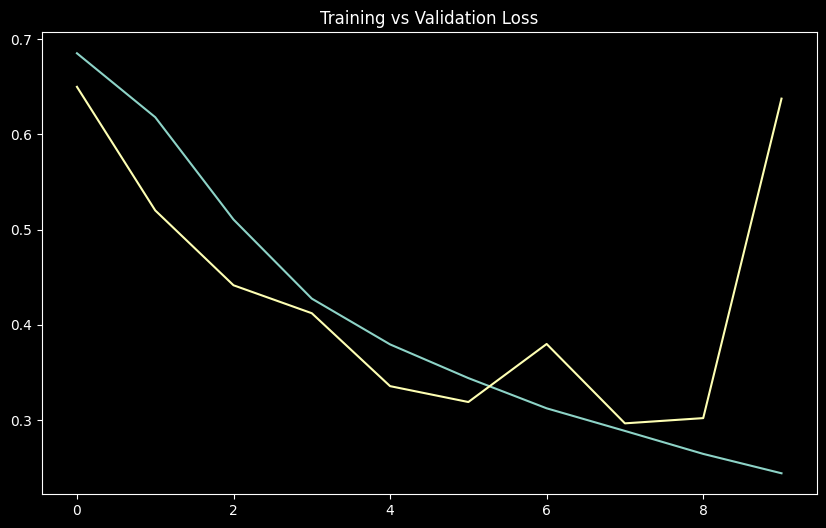

In [48]:
plt.figure(figsize = (10, 6))
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Testing Loss')
plt.title('Training vs Validation Loss')
plt.show()

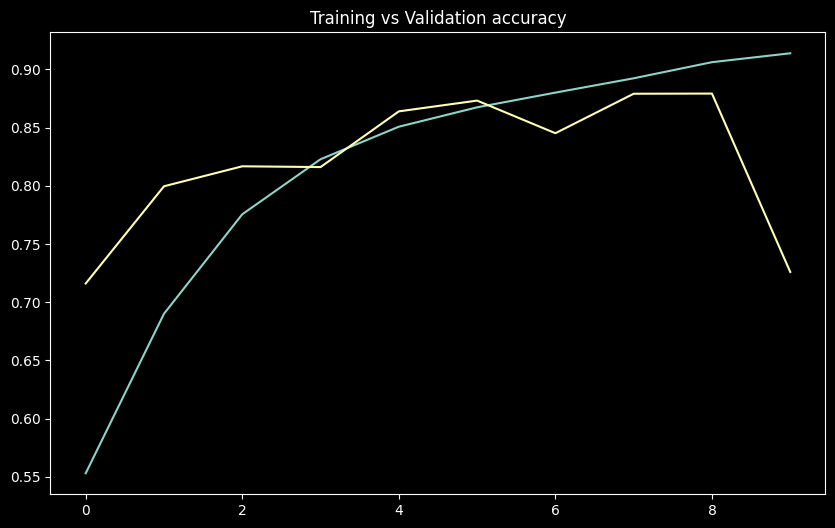

In [49]:
plt.figure(figsize = (10, 6))
plt.plot(history.history['acc'], label = 'Training accuracy')
plt.plot(history.history['val_acc'], label = 'Testing accuracy')
plt.title('Training vs Validation accuracy')
plt.show()

---
<font color=green>Q16:</font>
<br><font color='green'>
Evaluate your final model on the test data
</font>

---

In [50]:
model.evaluate(X_test, y_test)

780/780 [==============================] - 7s 9ms/step - loss: 0.6447 - acc: 0.7214


[0.6447429656982422, 0.7213758826255798]

# Wrap-up




**In this lecture, we covered the following:**

- Preprocessing sequences of word reviews.
- Creating a stack of fully connected layers for a binary classification task.
- Training the model using Stochastic Gradient Descent.
- Determining the optimal complexity of a neural network to strike a balance between **Optimization** and **Generalization**.

**How to improve the model:**

- Experimenting with hyperparameters and regularization techniques.
- Exploring better methods of encoding words (Refer to Lecture 5).
- Utilizing Sequential Models that account for the sequential nature of the data (Refer to Lectures 6, 7, and 8).
